In [ ]:
# Build an AI model that can classify SMS messages as spam or
# legitimate. Use techniques like TF-IDF or word embeddings with
# classifiers like Naive Bayes, Logistic Regression, or Support Vector
# Machines to identify spam messages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download the stopwords dataset
nltk.download('stopwords')

In [8]:
# Read the CSV file containing msgata into a DataFrame
df = pd.read_csv(r"C:/Users/SAEED COMPUTERS/Desktop/spam.csv",encoding='latin-1')


In [9]:
# Drop unnecessary columns from the DataFrame
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Rename the columns "v1 and "v2" to new names

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")
data = df.where((pd.notnull(df)), ' ')
data.loc[data["Category"] == "spam", "Category"] = 0
data.loc[data["Category"] == "ham", "Category"] = 1

In [12]:
# Separate the feature (message) and target (category) data

X = data["Message"]
Y = data["Category"]

In [13]:
#print(X)
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [14]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)
print(X.shape,Y.shape)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5572,) (5572,)
(4457,) (4457,)
(1115,) (1115,)


In [15]:
# Create a TF-IDF vectorizer to convert text messages into numerical features
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)


In [16]:
# Convert the training and testing text messages into numerical features using TF-IDF
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
# Convert the target values to integers (0 and 1)
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")
#print(X_train)
#print(X_train_features)


In [17]:
# Create a logistic regression model and train it on the training data

model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [18]:
# Make predictions on the training data and calculate the accuracy

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Accuracy on training data:",accuracy_on_training_data)


Accuracy on training data: 0.9661207089970832


In [19]:
# Make predictions on the test data and calculate the accuracy

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)
print("Accuracy on test data:",accuracy_on_test_data)

Accuracy on test data: 0.9623318385650225


In [20]:
# Test the model with some custom messages

input_your_msg = ["Congratulations! You have won a free vacation to an exotic destination. Click the link to claim your prize now!"]
input_data_features = feature_extraction.transform(input_your_msg)
prediction = model.predict(input_data_features)
print(prediction)

if (prediction)[0] == 1:
  print("Ham msg")
else:
  print("Spam msg")


[0]
Spam msg


In [21]:
# Test the model with some custom msg messages

input_your_msg = ["Meeting reminder: Tomorrow, 10 AM, conference room. See you there!"]
input_data_features = feature_extraction.transform(input_your_msg)
prediction = model.predict(input_data_features)
print(prediction)


[1]


In [23]:
# Print the prediction result

if (prediction)[0] == 1:
  print("Ham msg")
else:
  print("Spam msg")
spam_count = data[data['Category'] == 0].shape[0]
ham_count = data[data['Category'] == 1].shape[0]

Ham msg


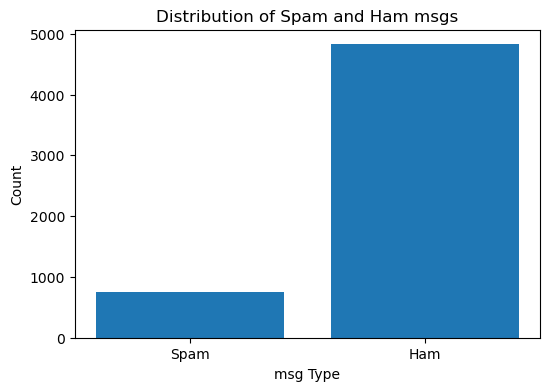

In [26]:
# Data visualization - Distribution of Spam and Ham msgs
plt.figure(figsize=(6, 4))
plt.bar(['Spam','Ham'], [spam_count,ham_count])
plt.xlabel('msg Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham msgs')
plt.show()

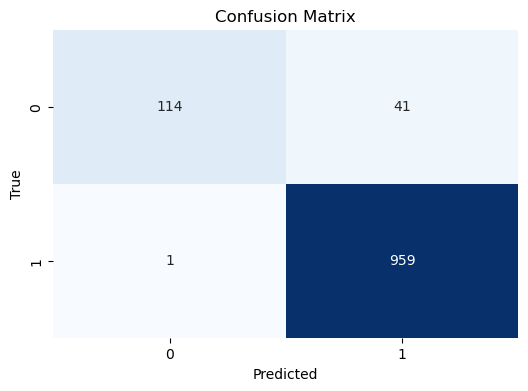

In [25]:
# Data visualization - Confusion Matrix

cm = confusion_matrix(Y_test, prediction_on_test_data)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

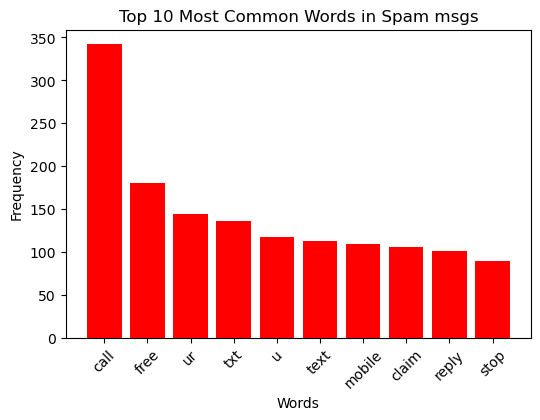

In [27]:
# Data visualization - Top 10 Most Common Words in Spam msgs
stop_words = set(stopwords.words('english'))
spam_words = " ".join(data[data['Category'] == 0]['Message']).split()
ham_words = " ".join(data[data['Category'] == 1]['Message']).split()
spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])
plt.figure(figsize=(6, 4))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='r')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam msgs')
plt.xticks(rotation=45)
plt.show()

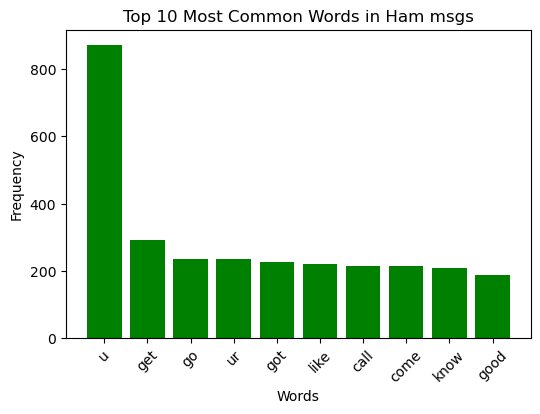

In [28]:
# Data visualization - Top 10 Most Common Words in Ham msgs
ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])
plt.figure(figsize=(6, 4))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham msgs')
plt.xticks(rotation=45)
plt.show()